## Sales Forecasting for Furniture Store Data

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
# Reading data
# The encoding is latin1 and we need to specify it
df = pd.read_csv("Super_Store_data.csv", encoding='latin1')

print("Dataset is:\n")

df

Dataset is:



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


## Step 1: Understanding Time Series Data

### Seeing Columns of the Dataset

In [3]:
print("Columns of Dataset are:\n")

df.columns

Columns of Dataset are:



Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Data Preprocessing

### Seeing Null values in the dataset

In [4]:
print("Null values in dataset are:\n")

df.isna().sum()

Null values in dataset are:



Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Seeing Descriptive Statistics of Dataset

In [5]:
print("Descriptive Statistics of Dataset are:\n")

df.describe()

Descriptive Statistics of Dataset are:



,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


### Seeing Information of Dataset

In [6]:
print("Information of Dataset are:\n")

df.info()

Information of Dataset are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non

### Now Since we have done step 1 let's move to step 2

## Step 2: Checking Components of Time Series

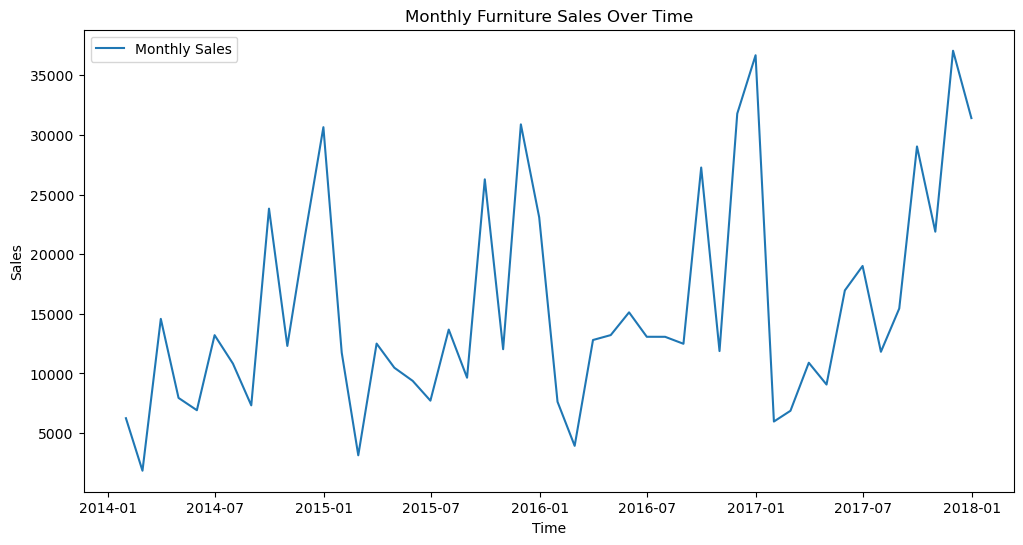

In [7]:
# Converting Order Date to Datetime index
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Resample data to monthly frequency
df_monthly = df['Sales'].resample('M').sum()

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly, label='Monthly Sales')
plt.title('Monthly Furniture Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Step 3: Forecasting Techniques

### ARIMA Model Explanation:

ARIMA stands for Autoregressive Integrated Moving Average. It is a popular time series forecasting model that combines autoregression (AR), differencing (I), and moving averages (MA) components. Here's a brief explanation of each component:

- **Autoregressive (AR):** This component captures the relationship between the current value and its past values. It involves predicting the next data point based on its own past values.

- **Integrated (I):** This component involves differencing the time series data to make it stationary. Stationarity is a key assumption for many time series models, and differencing helps in removing trends and seasonality.

- **Moving Average (MA):** This component considers the relationship between the current value and a residual error from a moving average of past values. It helps capture short-term fluctuations.

The ARIMA model is defined by three parameters: p (order of autoregression), d (degree of differencing), and q (order of moving average).

### Code Explanation:

Now, let's break down the provided code step by step:

1. **Resample Data:**
   - The monthly sum of furniture sales is calculated from the original dataset.

2. **Train-Test Split:**
   - The time series data is split into training and testing sets (80% training, 20% testing).

3. **Fit ARIMA Model:**
   - An ARIMA model is created and fitted using the training data.
   - The order of the ARIMA model is set to (1, 1, 1) as an example. You may need to tune these parameters based on your data.

4. **Forecast:**
   - The model is used to forecast future values based on the testing set.

5. **Calculate RMSE:**
   - The Root Mean Squared Error (RMSE) is calculated to evaluate the accuracy of the model's predictions.

6. **Plotting:**
   - The results are visualized using Matplotlib.
   - The training data, testing data, and the forecasted values are plotted together.

### Output:

The output of the code includes the RMSE value, which represents the average magnitude of the forecast error. Lower RMSE values indicate better model performance. Additionally, the plot visually compares the training data, testing data, and the forecasted values, allowing us to assess how well the ARIMA model captures the patterns in the time series data.

Root Mean Squared Error (RMSE): 10117.372955715455


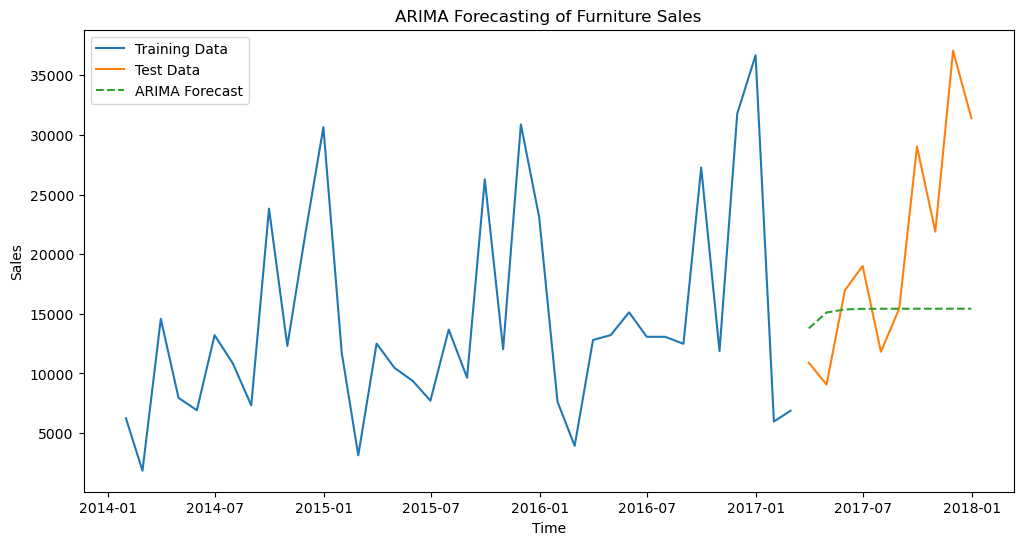

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Resample data to monthly frequency
df_monthly = df['Sales'].resample('M').sum()

# Train-test split
train_size = int(len(df_monthly) * 0.8)
train, test = df_monthly[:train_size], df_monthly[train_size:]

# Fit ARIMA model
order = (1, 1, 1)  # Example order, you may need to tune this
model = ARIMA(train, order=order)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='ARIMA Forecast', linestyle='dashed')
plt.title('ARIMA Forecasting of Furniture Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Since the model is not performing well we will do hyperparameter tuning

### Grid Search CV will be used it will give the best parameters which will lower error rate

Best ARIMA Model Order: (0, 2, 2)
Root Mean Squared Error (RMSE): 8301.571605452114


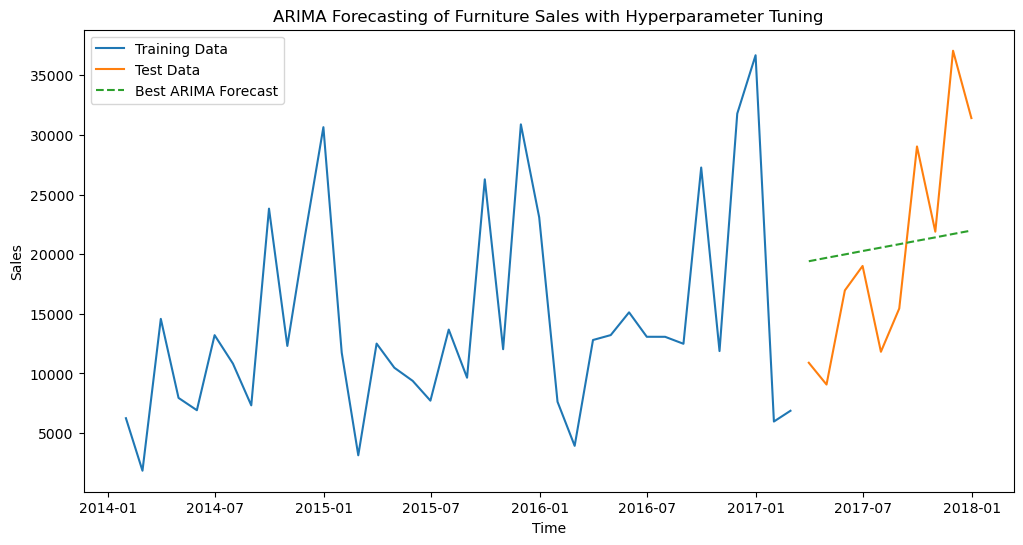

In [20]:
# To Ignore Warning
import warnings
warnings.filterwarnings("ignore")

# Resample data to monthly frequency
df_monthly = df['Sales'].resample('M').sum()

# Train-test split
train_size = int(len(df_monthly) * 0.8)
train, test = df_monthly[:train_size], df_monthly[train_size:]

# Define hyperparameter grid
p_values = range(0, 3)
d_values = range(1, 3)
q_values = range(0, 3)

best_rmse = float('inf')
best_order = None

# Hyperparameter tuning (Grid Search)
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            model = ARIMA(train, order=order)
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=len(test))
            rmse = np.sqrt(mean_squared_error(test, forecast))

            # Update best parameters if RMSE is improved
            if rmse < best_rmse:
                best_rmse = rmse
                best_order = order

# Fit the model with the best parameters
best_model = ARIMA(train, order=best_order)
best_model_fit = best_model.fit()

# Forecast using the best model
best_forecast = best_model_fit.forecast(steps=len(test))

# Calculate RMSE (Root Mean Squared Error)
print(f"Best ARIMA Model Order: {best_order}")
print(f"Root Mean Squared Error (RMSE): {best_rmse}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, best_forecast, label='Best ARIMA Forecast', linestyle='dashed')
plt.title('ARIMA Forecasting of Furniture Sales with Hyperparameter Tuning')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Step 4: Visualization in Time Series

In time series analysis, the decomposition of a time series into its key components—trend, seasonality, and residual—provides valuable insights into the underlying patterns and variations. Let's understand each component:

### 1. Trend:
The trend component represents the long-term movement or direction in the data. It captures the overall pattern that persists over an extended period. A rising or falling trend indicates a general increase or decrease in the values of the time series. Identifying the trend helps analysts understand the underlying growth or decline in the data, providing insights into long-term behavior.

### 2. Seasonality:
Seasonality refers to the repetitive and predictable patterns that occur at regular intervals within the time series. These patterns typically follow a fixed period, such as daily, monthly, or yearly cycles. Seasonal effects are often associated with external factors like weather, holidays, or other recurring events. Decomposing the time series into its seasonal component helps isolate these regular patterns, allowing for a clearer understanding of cyclic behaviors.

### 3. Residual:
The residual component, also known as the remainder or error, represents the unexplained variability in the data after accounting for the trend and seasonality. It encompasses random fluctuations, irregularities, or factors not captured by the trend and seasonal components. Analyzing the residuals can reveal whether the chosen model adequately captures the underlying patterns or if there are additional factors contributing to the variability.

### Code Explanation:
In the provided code snippet:

```python
# Seasonal decomposition using statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df_monthly, model='multiplicative')

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Furniture Sales', y=1.02)
plt.show()
```

The `seasonal_decompose` function is applied to `df_monthly`, and the resulting plot displays the three components—trend, seasonality, and residual—allowing for a visual inspection of their individual contributions.

### Output Interpretation:
- **Top Subplot:** Represents the observed time series.
- **Second Subplot:** Illustrates the trend component.
- **Third Subplot:** Displays the seasonal component.
- **Bottom Subplot:** Shows the residual component.

By examining these subplots, we can gain insights into how the data's long-term trends, seasonal patterns, and unexplained variations contribute to the overall behavior of furniture sales over time. This information is valuable for making informed decisions about modeling and forecasting.

<Figure size 1200x800 with 0 Axes>

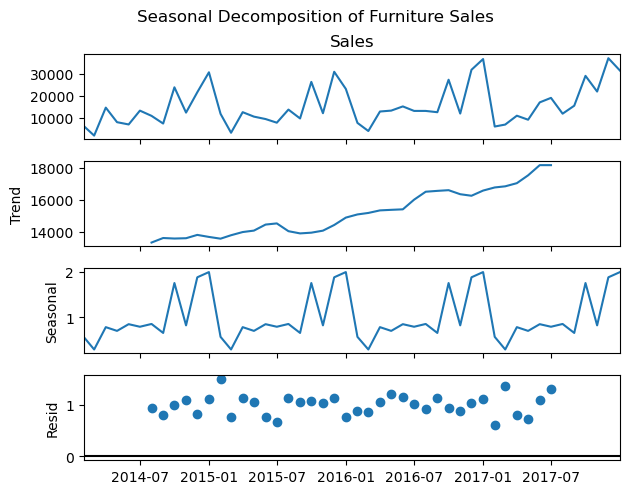

In [17]:
# Additional visualization techniques for time series data
# E.g., seasonal decomposition, rolling statistics, etc.

# Seasonal decomposition using statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df_monthly, model='multiplicative')

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Furniture Sales', y=1.02)
plt.show()